<a href="https://colab.research.google.com/github/zeynepmerve97/FaceRecognitionModelwithCNN/blob/main/MODELwithLFW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import numpy as np
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import os
import pandas as pd
import cv2

In [ ]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [ ]:
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [ ]:
print("Total dataset size:")
print("number of samples: " , n_samples)
print("number of classes: " , n_classes)
print("image dimensions: ", h, w)
print("number of features per image: ", h*w)

Total dataset size:
number of samples:  1288
number of classes:  7
image dimensions:  50 37
number of features per image:  1850


In [ ]:
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [ ]:
labelNames=["Ariel Sharon", "Colin Powell", "Donald Rumsfeld", "George W Bush",
           "Gerhard Schroeder", "Hugo Chavez", "Jean Chretien",
       "Ahcroft", "Junichiro Koizumi", "Tony Blair"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print(X_train.shape)

(772, 1850)


In [ ]:
import tensorflow as tf

y_train= tf.keras.utils.to_categorical(y_train, num_classes= 10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes= 10)

In [ ]:
#görüntülerin ağırlık ve derinlik değerleri 50 olarak ayarlanıyor.
img=[]
for i in range(len(X_train)):
      z=cv2.resize(X_train[i],(50,50)).astype(np.float32)
      z = np.expand_dims(z, axis=0)
      img.append(z)
Xnew_train=np.array(img)
img=[]
for i in range(len(X_test)):
  r=cv2.resize(X_train[i],(50,50)).astype(np.float32)
  r = np.expand_dims(r, axis=0)
  img.append(r)
Xnew_test=np.array(img)

In [ ]:
x_test= Xnew_test.reshape(-1,50,50,1)
x_train = Xnew_train.reshape(-1,50,50,1)
print(x_train.shape)
print(x_test.shape)

(772, 50, 50, 1)
(516, 50, 50, 1)


FIRST MODEL

In [ ]:
model_first = Sequential()
model_first .add(Conv2D(32, kernel_size = (5,5),padding = 'Same',strides=(2, 2),
                 activation ='relu', input_shape = (50,50,1) ))
model_first .add(Conv2D(64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_first .add(MaxPooling2D(5,5,padding='same'))
model_first .add(Dropout(0.25))

model_first .add(Conv2D(128, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_first .add(Conv2D(256, kernel_size = (5,5),padding = 'Same', 
                  
                 activation ='relu'))

model_first .add(Dropout(0.50))

model_first .add(Flatten())
model_first .add(Dense(128, activation = "relu"))
model_first .add(Dropout(0.50))

model_first .add(Dense(10, activation = "softmax"))
     
    
model_first .compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_first.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 256)         819456    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 256)         0

In [ ]:
epochs = 25
batch_size = 128
hist1= model_first.fit(x_train, y_train, epochs=epochs, batch_size = batch_size,verbose=1, validation_data=(x_test, y_test))

In [ ]:
score_first = model_first.evaluate(x_test, y_test, verbose=0)
print('model Test accuracy: {0:%}'.format(score_first[1]))

In [ ]:
# ilk model doğruluk grafiği
import matplotlib.pyplot as plt

plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('first_model_accuracy.jpeg')

In [ ]:
#ilk model kayıp grafiği
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('first_model_loss.jpeg')

SECOND MODEL

In [ ]:
model_second= Sequential()
model_second.add(Conv2D(32, kernel_size = (5,5),padding = 'Same',strides=(2, 2),
                 activation ='relu', input_shape = (50,50,1) ))
model_second.add(Conv2D(64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_second.add(MaxPooling2D(5,5,padding='same'))
model_second.add(Dropout(0.25))

model_second.add(Conv2D(128, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_second.add(Conv2D(256, kernel_size = (5,5),padding = 'Same', 
                  
                 activation ='relu'))

model_second.add(Dropout(0.50))

model_second.add(Flatten())
model_second.add(Dense(128, activation = "relu"))
model_second.add(Dropout(0.50))

model_second.add(Dense(10, activation = "sigmoid"))
     
    
model_second.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

In [ ]:
model_second.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 25, 25, 32)        832       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 5, 5, 128)         204928    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 5, 5, 256)         819456    
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 256)        

In [ ]:
epochs = 25
batch_size = 128
hist= model_second.fit(x_train, y_train, epochs=epochs, batch_size = batch_size,verbose=1, validation_data=(x_test, y_test))

Epoch 1/25
7/7 [==============================] - 26s 1s/step - loss: 2.8965 - binary_accuracy: 0.7012 - val_loss: 0.2954 - val_binary_accuracy: 0.9002
Epoch 2/25
7/7 [==============================] - 9s 1s/step - loss: 0.3481 - binary_accuracy: 0.8734 - val_loss: 0.2992 - val_binary_accuracy: 0.9000
Epoch 3/25
7/7 [==============================] - 9s 1s/step - loss: 0.3334 - binary_accuracy: 0.8771 - val_loss: 0.2691 - val_binary_accuracy: 0.8837
Epoch 4/25
7/7 [==============================] - 9s 1s/step - loss: 0.3421 - binary_accuracy: 0.8789 - val_loss: 0.2743 - val_binary_accuracy: 0.9000
Epoch 5/25
7/7 [==============================] - 9s 1s/step - loss: 0.3149 - binary_accuracy: 0.8867 - val_loss: 0.2826 - val_binary_accuracy: 0.8977
Epoch 6/25
7/7 [==============================] - 9s 1s/step - loss: 0.3146 - binary_accuracy: 0.8797 - val_loss: 0.2681 - val_binary_accuracy: 0.9000
Epoch 7/25
7/7 [==============================] - 9s 1s/step - loss: 0.3031 - binary_accuracy

In [ ]:
score_second = model_second.evaluate(x_test, y_test, verbose=0)
print('model Test accuracy: {0:%}'.format(score_second[1]))
print('model Test LOSS: {0:%}'.format(score_second[0]))

model Test accuracy: 89.108533%
model Test LOSS: 29.410717%


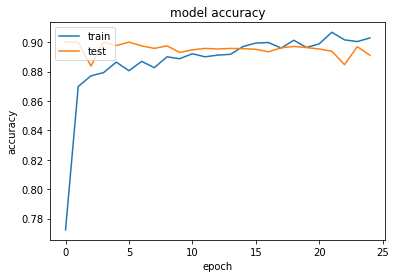

<Figure size 432x288 with 0 Axes>

In [ ]:
#ikinci model doğruluk grafiği
import matplotlib.pyplot as plt

plt.plot(hist.history['binary_accuracy'])
plt.plot(hist.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('second_model_accuracy.jpeg')

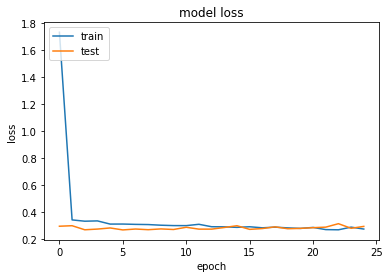

<Figure size 432x288 with 0 Axes>

In [ ]:
#ikinci model kayıp grafiği
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('second_model_loss.jpeg')